In [1]:
!pip install pydicom numpy pandas matplotlib opencv-python scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.5 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 1.9 MB/s eta 0:00:0000:0100:01


In [2]:
import pydicom
import cv2
print("Libraries installed correctly")


Libraries installed correctly


In [4]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
import matplotlib.pyplot as plt


In [5]:
import pydicom
import numpy
import pandas
import matplotlib
import cv2
import sklearn

print("All libraries imported successfully ✅")


All libraries imported successfully ✅


In [6]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def load_dicom_volume(subject_path):
    dicom_files = [
        os.path.join(subject_path, f)
        for f in os.listdir(subject_path)
        if f.lower().endswith(".dcm")
    ]

    dicom_files.sort(key=lambda x: pydicom.dcmread(x).InstanceNumber)

    slices = [pydicom.dcmread(f).pixel_array for f in dicom_files]
    volume = np.stack(slices, axis=0)

    return volume


MRI volume shape: (170, 256, 256)


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

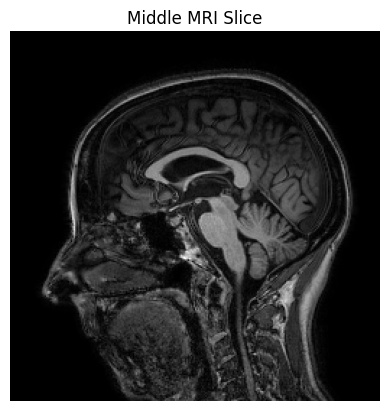

In [7]:
subject_path = "../data/raw_mri/subject_001"

volume = load_dicom_volume(subject_path)

print("MRI volume shape:", volume.shape)

mid = volume.shape[0] // 2
plt.imshow(volume[mid], cmap="gray")
plt.title("Middle MRI Slice")
plt.axis("off")


In [8]:
import cv2

def preprocess_slice(slice_2d):
    slice_2d = slice_2d.astype(np.float32)

    # Min-max normalization [0,1]
    slice_2d = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min() + 1e-6)

    # Resize to fixed size
    slice_2d = cv2.resize(slice_2d, (224, 224))

    return slice_2d


In [9]:
def extract_processed_slices(volume, num_slices=10):
    center = volume.shape[0] // 2
    half = num_slices // 2

    processed = []
    for i in range(center - half, center + half):
        processed.append(preprocess_slice(volume[i]))

    return np.array(processed)



Processed shape: (10, 224, 224)


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

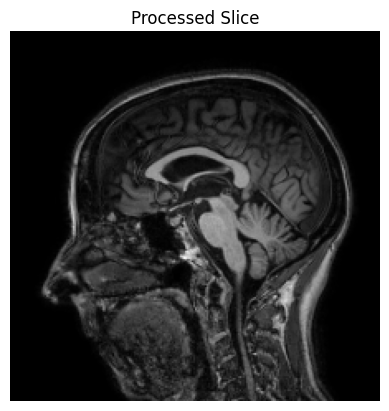

In [10]:
processed_slices = extract_processed_slices(volume)

print("Processed shape:", processed_slices.shape)

plt.imshow(processed_slices[5], cmap="gray")
plt.title("Processed Slice")
plt.axis("off")


In [17]:
import os

subject_path = "../data/raw_mri/subject_001"

print("Walking through subject_001:")
for root, _, files in os.walk(subject_path):
    print("📂", root)
    for f in files[:10]:
        print("   └──", f)


Walking through subject_001:
📂 ../data/raw_mri/subject_001
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180522199_142_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180230560_22_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180510189_133_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180300002_43_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180453207_121_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180257610_41_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180455652_123_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180241966_30_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180355192_81_S14782_I15800.dcm
   └── ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180407809_89_S1478

In [18]:
import pydicom

found = False

for root, _, files in os.walk("../data/raw_mri/subject_001"):
    for f in files:
        path = os.path.join(root, f)
        try:
            dcm = pydicom.dcmread(path)
            if hasattr(dcm, "PixelData"):
                print("✅ PixelData found in:", path)
                print("   Shape:", dcm.pixel_array.shape)
                found = True
                break
        except:
            pass

print("\nPixel data exists?", found)


✅ PixelData found in: ../data/raw_mri/subject_001/ADNI_002_S_0413_MR____________MPRAGE_SENS_br_raw_20060519180522199_142_S14782_I15800.dcm
   Shape: (256, 256)

Pixel data exists? True


In [20]:
def load_dicom_volume(subject_path):
    slices = []

    for root, _, files in os.walk(subject_path):
        for f in files:
            path = os.path.join(root, f)
            try:
                dcm = pydicom.dcmread(path)
                if hasattr(dcm, "PixelData"):
                    slices.append(dcm)
            except:
                continue

    if len(slices) == 0:
        raise ValueError("No DICOM slices with pixel data found")

    # Sort safely
    def sort_key(dcm):
        return int(getattr(dcm, "InstanceNumber", 0))

    slices.sort(key=sort_key)

    volume = np.stack([dcm.pixel_array for dcm in slices], axis=0)
    return volume


In [21]:
volume = load_dicom_volume("../data/raw_mri/subject_001")
print("Volume shape:", volume.shape)


Volume shape: (170, 256, 256)


In [24]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2

# ==============================
# PATHS
# ==============================
raw_dir = "../data/raw_mri"
processed_dir = "../data/processed"
labels_path = "../data/labels.csv"

os.makedirs(processed_dir, exist_ok=True)

# ==============================
# LOAD LABELS
# ==============================
labels = pd.read_csv(labels_path)
print("CSV columns:", labels.columns.tolist())

# ==============================
# DICOM LOADER (FIXED)
# ==============================
def load_dicom_volume(subject_path):
    slices = []

    for root, _, files in os.walk(subject_path):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                dcm = pydicom.dcmread(filepath)
                if hasattr(dcm, "PixelData"):
                    slices.append(dcm)
            except:
                continue

    if len(slices) == 0:
        raise ValueError("No valid DICOM slices with pixel data")

    # Sort safely by InstanceNumber
    def sort_key(dcm):
        return int(getattr(dcm, "InstanceNumber", 0))

    slices.sort(key=sort_key)

    volume = np.stack([dcm.pixel_array for dcm in slices], axis=0)
    return volume

# ==============================
# SKULL STRIPPING (LIGHTWEIGHT)
# ==============================
def skull_strip(slice_2d):
    img = slice_2d.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)
    img_u8 = (img * 255).astype(np.uint8)

    _, thresh = cv2.threshold(
        img_u8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    kernel = np.ones((5,5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    return img_u8 * (thresh > 0)

# ==============================
# PREPROCESS ONE SLICE
# ==============================
def preprocess_slice(slice_2d):
    slice_2d = skull_strip(slice_2d)
    slice_2d = cv2.resize(slice_2d, (224, 224))
    slice_2d = slice_2d / 255.0
    return slice_2d

# ==============================
# EXTRACT CENTER SLICES
# ==============================
def extract_processed_slices(volume, num_slices=10):
    center = volume.shape[0] // 2
    half = num_slices // 2

    processed = []
    for i in range(center - half, center + half):
        processed.append(preprocess_slice(volume[i]))

    return np.array(processed)

# ==============================
# MAIN PREPROCESSING LOOP
# ==============================
saved_count = 0
skipped_count = 0

for subject in os.listdir(raw_dir):
    subject_path = os.path.join(raw_dir, subject)

    if not os.path.isdir(subject_path):
        continue

    try:
        volume = load_dicom_volume(subject_path)
    except Exception as e:
        print(f"Skipping {subject} → {e}")
        skipped_count += 1
        continue

    try:
        processed = extract_processed_slices(volume)
    except Exception as e:
        print(f"Slice processing failed for {subject} → {e}")
        skipped_count += 1
        continue

    # ✅ FIXED CSV MAPPING
    row = labels[labels["Subject"] == subject]
    if row.empty:
        print(f"No label found for {subject}, skipping")
        skipped_count += 1
        continue

    diagnosis = row["Group"].values[0]

    class_dir = os.path.join(processed_dir, diagnosis)
    os.makedirs(class_dir, exist_ok=True)

    np.save(os.path.join(class_dir, subject + ".npy"), processed)
    saved_count += 1
    print(f"Saved {subject}.npy → {diagnosis}")

print("\n==============================")
print("PREPROCESSING COMPLETED")
print("Saved subjects :", saved_count)
print("Skipped subjects:", skipped_count)
print("==============================")


CSV columns: ['ImageID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description', 'Type', 'AcqDate', 'Format', 'Downloaded']
Saved 136_S_1227.npy → MCI
Skipping .ipynb_checkpoints → No valid DICOM slices with pixel data
Saved 136_S_0579.npy → MCI

PREPROCESSING COMPLETED
Saved subjects : 2
Skipped subjects: 1


In [23]:
print(labels["Subject"].unique()[:20])


<StringArray>
['136_S_1227', '136_S_0579', '136_S_0429', '136_S_0426', '136_S_0300',
 '136_S_0299', '136_S_0196', '136_S_0195', '136_S_0194', '136_S_0184',
 '136_S_0086', '133_S_1170', '133_S_1055', '133_S_1031', '133_S_0913',
 '133_S_0912', '133_S_0792', '133_S_0771', '133_S_0727', '133_S_0638']
Length: 20, dtype: str
